Shape of Iris: (150, 4)


Text(0, 0.5, 'Second feature')

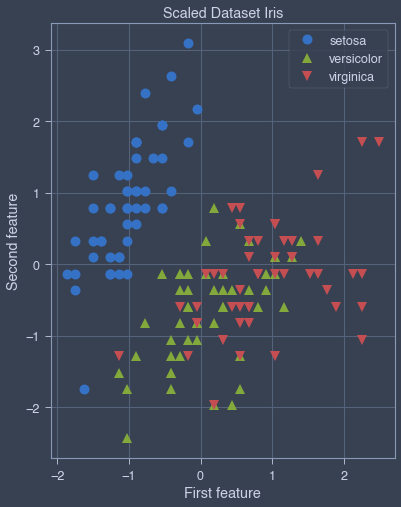

In [43]:
# iris is low-dimensional data, 150 * 4
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
import mglearn
np.random.seed(0)

iris = load_iris()
scaler = StandardScaler() 
scaler.fit(iris.data)
X_scaled = scaler.transform(iris.data)
num_class = 3

print("Shape of Iris: {}".format(iris.data.shape))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], iris.target) 
plt.legend(iris.target_names, loc="best") 
plt.title("Scaled Dataset Iris")
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")

Original shape: (150, 4)
Reduced shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]


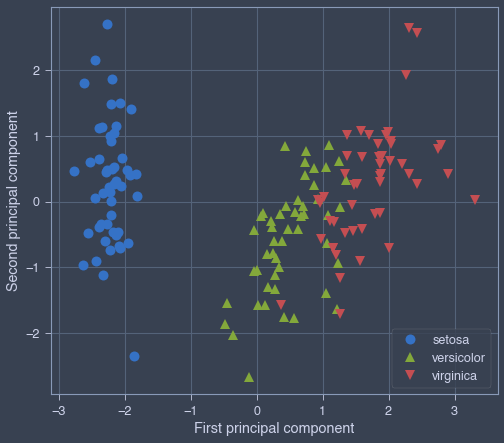

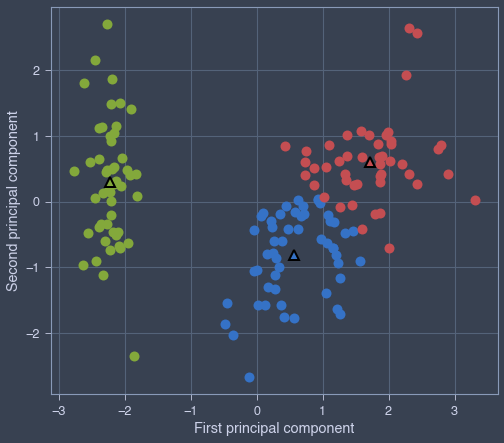

In [28]:


from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=0.85, svd_solver = 'full')
# fit PCA model to breast cancer data 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], iris.target) 
plt.legend(iris.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

from sklearn.cluster import KMeans

# build the clustering model
pca_kmeans = KMeans(n_clusters=num_class, random_state=17, n_init=100) 
pca_kmeans.fit(X_pca)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], pca_kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

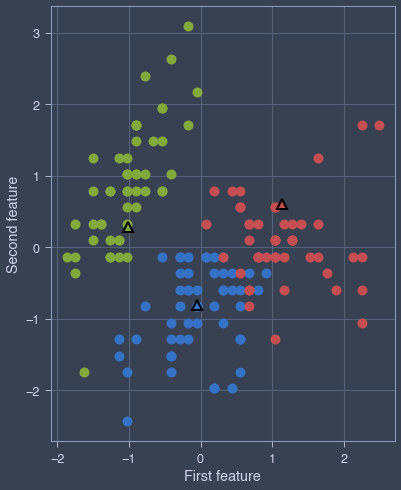

In [21]:
kmeans = KMeans(n_clusters=num_class, random_state = 17, n_init=100) 
kmeans.fit(X_scaled)

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

In [22]:
from sklearn.metrics.cluster import fowlkes_mallows_score
from purity import purity_score

labels_true = iris.target
labels_pred = kmeans.labels_
pca_labels_pred = pca_kmeans.labels_

print(fowlkes_mallows_score(labels_true, labels_pred))
print(fowlkes_mallows_score(labels_true, pca_labels_pred))

0.7452105043132992
0.7452105043132992


In [23]:


print(purity_score(labels_true, labels_pred))
print(purity_score(labels_true, pca_labels_pred))

0.8333333333333334
0.8333333333333334


In [24]:
from sklearn.metrics.cluster import adjusted_rand_score

print(adjusted_rand_score(labels_true, labels_pred))
print(adjusted_rand_score(labels_true, pca_labels_pred))


0.6201351808870379
0.6201351808870379


Explained variance ratio: [0.92461872 0.05306648]

PC 1 without scaling:
 [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


Text(0.5, 1.0, 'Iris Processed by PCA')

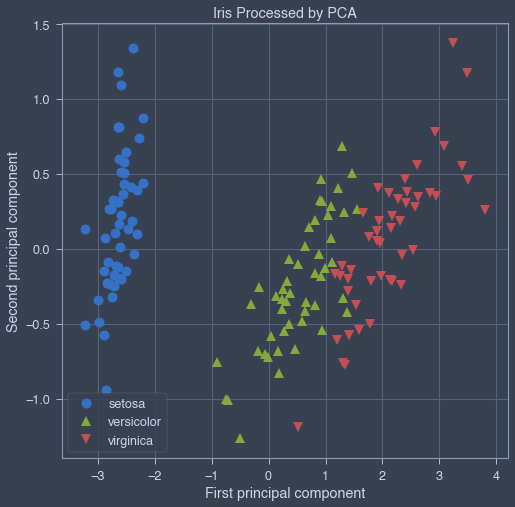

In [42]:
# test unscaled data
from sklearn.decomposition import PCA
unscaledX = iris.data 
# keep the first two principal components of the data 
unscaled_pca = PCA(n_components=2, svd_solver = 'full')
# fit PCA model to breast cancer data 
unscaled_pca.fit(unscaledX)
# transform data onto the first two principal components
unscaledX_pca = unscaled_pca.transform(unscaledX)
#print("Original shape: {}".format(str(X_scaled.shape))) 
#print("Reduced shape: {}".format(str(X_pca.shape)))
print("Explained variance ratio: {}".format(unscaled_pca.explained_variance_ratio_))
print('\nPC 1 without scaling:\n', unscaled_pca.components_[0])

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(unscaledX_pca[:, 0], unscaledX_pca[:, 1], iris.target) 
plt.legend(iris.target_names, loc="best") 
#plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Iris Processed by PCA")

Text(0, 0.5, 'Second feature (cm)')

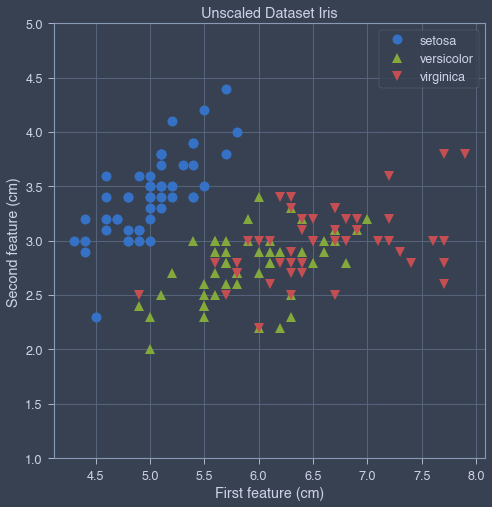

In [41]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(iris.data[:, 0], iris.data[:, 1], iris.target) 
plt.legend(iris.target_names, loc="best") 
plt.title("Unscaled Dataset Iris")
plt.ylim(1,5)
plt.gca().set_aspect("equal")
plt.xlabel("First feature (cm)")
plt.ylabel("Second feature (cm)")